In [95]:

import anndata
import scvi
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt


In [96]:
fn = '../data/round1round2_processed.h5ad'
adata = anndata.read_h5ad(fn)

In [3]:
adata.obs

,infection,variant,condition,library_size,library_size_log,SARS2_genome_ORF1ab_counts,SARS2_genome_ORF1ab_log,SARS2_genome_S_counts,SARS2_genome_S_log,SARS2_genome_ORF3a_counts,...,gmm_infection,infection_gmm,infection_gmm_annotated,manual_ct_annotation,vision_clusters,vision_clusters_old,r1_vision_clusters_annotated_1,r1_vision_clusters_annotated_2,r2_vision_clusters_annotated,infection_str
AAACCCAGTCCGCAGT-1,I,WA1_1,ACE2,17028.0,9.742673,0.0,0.000000,0.0,0.000000,0.0,...,0,I_0,No Infection,basal cell,Cluster 1,Cluster 1,SARS-CoV-2 RNA- Basal Cells,WT/ACE2 OE \n SARS-Cov2-2 RNA-,na,Infected
AAACCCATCAGGTAAA-1,I,WA1_1,ACE2,32806.0,10.398397,1.0,0.693147,0.0,0.000000,0.0,...,0,I_0,No Infection,basal cell,Cluster 2,Cluster 2,SARS-CoV-2 RNA- Basal Cells,ACE2 OE \n SARS-Cov2-2 RNA-,na,Infected
AAACCCATCCTGTTAT-1,I,WA1_1,ACE2,7676.0,8.945984,0.0,0.000000,0.0,0.000000,0.0,...,0,I_0,No Infection,basal cell,Cluster 3,Cluster 2,SARS-CoV-2 RNA- Basal Cells,ACE2 OE \n SARS-Cov2-2 RNA-,na,Infected
AAACCCATCTAGTTCT-1,I,WA1_1,ACE2,16813.0,9.729967,0.0,0.000000,0.0,0.000000,0.0,...,0,I_0,No Infection,basal cell,Cluster 1,Cluster 3,SARS-CoV-2 RNA- Basal Cells,WT/ACE2 OE \n SARS-Cov2-2 RNA-,na,Infected
AAACGAACATTCCTCG-1,I,WA1_1,ACE2,17001.0,9.741086,1.0,0.693147,0.0,0.000000,0.0,...,0,I_0,No Infection,basal cell,Cluster 1,Cluster 3,SARS-CoV-2 RNA- Basal Cells,WT/ACE2 OE \n SARS-Cov2-2 RNA-,na,Infected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGATCCACGACGCT-1,I,B.1.1.7,ACE2,18491.0,9.825093,120.0,4.795791,50.0,3.931826,29.0,...,2,I_2,High Infection,basal cell,Cluster 11,Cluster 13,na,na,SARS-CoV-2 RNA+ Basal Cells,Infected
TTTGATCGTGGTCTCG-1,I,B.1.1.7,ACE2,6972.0,8.849801,312.0,5.746203,115.0,4.753590,16.0,...,2,I_2,High Infection,basal cell,Cluster 11,Cluster 13,na,na,SARS-CoV-2 RNA+ Basal Cells,Infected
TTTGGTTCAACACGTT-1-1,I,B.1.1.7,ACE2,42206.0,10.650341,3.0,1.386294,0.0,0.000000,0.0,...,0,I_0,No Infection,basal cell,Cluster 1,Cluster 1,na,na,SARS-CoV-2 RNA- Basal/Goblet Cells,Infected
TTTGGTTCAAGTGCTT-1-1,I,B.1.1.7,ACE2,50667.0,10.833050,0.0,0.000000,0.0,0.000000,0.0,...,0,I_0,No Infection,basal cell,Cluster 7,Cluster 8,na,na,SARS-CoV-2 RNA- Basal Cells,Infected


In [4]:
adata.X = np.array(adata.X.todense())
adata.layers['raw_counts'] = adata.X.copy()

sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)


In [5]:
round2_index = adata.obs[adata.obs['condition'] == 'ACE2'].index
adata = adata[round2_index]

In [6]:
adata.obs

,infection,variant,condition,library_size,library_size_log,SARS2_genome_ORF1ab_counts,SARS2_genome_ORF1ab_log,SARS2_genome_S_counts,SARS2_genome_S_log,SARS2_genome_ORF3a_counts,...,gmm_infection,infection_gmm,infection_gmm_annotated,manual_ct_annotation,vision_clusters,vision_clusters_old,r1_vision_clusters_annotated_1,r1_vision_clusters_annotated_2,r2_vision_clusters_annotated,infection_str
AAACCCAGTCCGCAGT-1,I,WA1_1,ACE2,17028.0,9.742673,0.0,0.000000,0.0,0.000000,0.0,...,0,I_0,No Infection,basal cell,Cluster 1,Cluster 1,SARS-CoV-2 RNA- Basal Cells,WT/ACE2 OE \n SARS-Cov2-2 RNA-,na,Infected
AAACCCATCAGGTAAA-1,I,WA1_1,ACE2,32806.0,10.398397,1.0,0.693147,0.0,0.000000,0.0,...,0,I_0,No Infection,basal cell,Cluster 2,Cluster 2,SARS-CoV-2 RNA- Basal Cells,ACE2 OE \n SARS-Cov2-2 RNA-,na,Infected
AAACCCATCCTGTTAT-1,I,WA1_1,ACE2,7676.0,8.945984,0.0,0.000000,0.0,0.000000,0.0,...,0,I_0,No Infection,basal cell,Cluster 3,Cluster 2,SARS-CoV-2 RNA- Basal Cells,ACE2 OE \n SARS-Cov2-2 RNA-,na,Infected
AAACCCATCTAGTTCT-1,I,WA1_1,ACE2,16813.0,9.729967,0.0,0.000000,0.0,0.000000,0.0,...,0,I_0,No Infection,basal cell,Cluster 1,Cluster 3,SARS-CoV-2 RNA- Basal Cells,WT/ACE2 OE \n SARS-Cov2-2 RNA-,na,Infected
AAACGAACATTCCTCG-1,I,WA1_1,ACE2,17001.0,9.741086,1.0,0.693147,0.0,0.000000,0.0,...,0,I_0,No Infection,basal cell,Cluster 1,Cluster 3,SARS-CoV-2 RNA- Basal Cells,WT/ACE2 OE \n SARS-Cov2-2 RNA-,na,Infected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGATCCACGACGCT-1,I,B.1.1.7,ACE2,18491.0,9.825093,120.0,4.795791,50.0,3.931826,29.0,...,2,I_2,High Infection,basal cell,Cluster 11,Cluster 13,na,na,SARS-CoV-2 RNA+ Basal Cells,Infected
TTTGATCGTGGTCTCG-1,I,B.1.1.7,ACE2,6972.0,8.849801,312.0,5.746203,115.0,4.753590,16.0,...,2,I_2,High Infection,basal cell,Cluster 11,Cluster 13,na,na,SARS-CoV-2 RNA+ Basal Cells,Infected
TTTGGTTCAACACGTT-1-1,I,B.1.1.7,ACE2,42206.0,10.650341,3.0,1.386294,0.0,0.000000,0.0,...,0,I_0,No Infection,basal cell,Cluster 1,Cluster 1,na,na,SARS-CoV-2 RNA- Basal/Goblet Cells,Infected
TTTGGTTCAAGTGCTT-1-1,I,B.1.1.7,ACE2,50667.0,10.833050,0.0,0.000000,0.0,0.000000,0.0,...,0,I_0,No Infection,basal cell,Cluster 7,Cluster 8,na,na,SARS-CoV-2 RNA- Basal Cells,Infected


In [8]:
#adata.write(filename = "IAV_only_data_clean_subsetted_names_added_counts.h5ad")

In [9]:
'SARS2_genome_ORF1ab'[:5]

'SARS2'

In [10]:
adata[adata.obs[adata.obs['variant'] == 'Uninfected_2'].index].obs

,infection,variant,condition,library_size,library_size_log,SARS2_genome_ORF1ab_counts,SARS2_genome_ORF1ab_log,SARS2_genome_S_counts,SARS2_genome_S_log,SARS2_genome_ORF3a_counts,...,knn_on_scanorama_pred,_scvi_batch,_scvi_labels,_scvi_local_l_mean,_scvi_local_l_var,3gmm_infection_individual,3gmm_infection_total,2gmm_infection_individual,2gmm_infection_total,gmm_infection
AAACCCATCGGCATCG-1,U,Uninfected_2,ACE2,726.0,6.588926,0.0,0.0,0.0,0.0,0.0,...,plasma cell,1,0,6.367458,0.168144,0,1,0,0,0
AAACGAACACTGTCCT-1,U,Uninfected_2,ACE2,865.0,6.763885,0.0,0.0,0.0,0.0,0.0,...,basal cell,1,0,6.367458,0.168144,0,1,0,0,0
AAAGAACAGCTCCCTT-1,U,Uninfected_2,ACE2,753.0,6.625392,0.0,0.0,0.0,0.0,0.0,...,club cell,1,0,6.367458,0.168144,0,1,0,0,0
AAAGAACAGTTGTACC-1,U,Uninfected_2,ACE2,1411.0,7.252762,0.0,0.0,0.0,0.0,0.0,...,respiratory goblet cell,1,0,6.367458,0.168144,0,1,0,0,0
AAAGAACTCGAGATAA-1,U,Uninfected_2,ACE2,1307.0,7.176255,0.0,0.0,0.0,0.0,0.0,...,basal cell,1,0,6.367458,0.168144,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGAGCAATCAGCT-1,U,Uninfected_2,ACE2,1591.0,7.372746,0.0,0.0,0.0,0.0,0.0,...,basal cell,1,0,6.367458,0.168144,0,1,0,0,0
TTTGGAGTCCCAAGTA-1-1,U,Uninfected_2,ACE2,107139.0,11.581892,0.0,0.0,0.0,0.0,0.0,...,basal cell,1,0,6.367458,0.168144,0,1,0,0,0
TTTGGTTCATTGAGCT-1,U,Uninfected_2,ACE2,32989.0,10.403960,0.0,0.0,0.0,0.0,0.0,...,basal cell,1,0,6.367458,0.168144,0,1,0,0,0
TTTGGTTTCAGGAAAT-1,U,Uninfected_2,ACE2,25225.0,10.135631,0.0,0.0,0.0,0.0,0.0,...,basal cell,1,0,6.367458,0.168144,0,1,0,0,0


In [11]:
np.unique(adata.obs['variant'])

array(['B.1.1.7', 'B.1.351', 'B.1.351_delta', 'B.1.429', 'Uninfected_1',
       'Uninfected_2', 'WA1_1', 'WA1_2'], dtype=object)

In [7]:
from scipy.stats import pearsonr

pear_df = pd.DataFrame(columns=['gene', 'corr', 'p_value', 'variant'])

results = []
for variant in np.unique(adata.obs['variant']):
    print(variant)
    vadata = adata[adata.obs[adata.obs['variant'] == variant].index]
    b = vadata.obs['sars2_total_counts'].values
    for j, gene in enumerate(vadata.var_names):        
        if j%1000==0:
            print(j)
        if gene[:5] != 'SARS2':
            a = vadata[:,gene].X.flatten()
            sp, p = pearsonr(a,b)
            results.append([gene, sp, p, variant])

pear_df = pd.DataFrame(data=results, columns=['gene', 'corr', 'p_value', 'variant'])

B.1.1.7
0


/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
B.1.351
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
B.1.351_delta
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
B.1.429
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
Uninfected_1
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
2200

In [8]:
pear_df.to_csv('correlation_results.csv')

In [30]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(pear_df.sort_values('corr', ascending=False)[:20])

              gene      corr       p_value       variant
230157        EGR1  0.476586  0.000000e+00         WA1_1
207252     GPR137C  0.468718  1.837477e-64  Uninfected_2
216083  AL034428.1  0.446442  5.971230e-58  Uninfected_2
194393  AL138824.1  0.446442  5.971230e-58  Uninfected_2
207594  AC007686.5  0.446442  5.971230e-58  Uninfected_2
193702      PCDH12  0.446442  5.971230e-58  Uninfected_2
192318  AC093824.2  0.446442  5.971230e-58  Uninfected_2
204377  AC087318.1  0.446442  5.971230e-58  Uninfected_2
219365         BGN  0.446442  5.971230e-58  Uninfected_2
213345  AC023983.2  0.446442  5.971230e-58  Uninfected_2
210102     NPIPB12  0.446442  5.971230e-58  Uninfected_2
192109  AC107208.1  0.446442  5.971230e-58  Uninfected_2
210958  AC009108.3  0.446442  5.971230e-58  Uninfected_2
210593      KCTD19  0.446442  5.971230e-58  Uninfected_2
203701       SCN2B  0.446442  5.971230e-58  Uninfected_2
213888      PLPPR3  0.446442  5.971230e-58  Uninfected_2
203561  AP002433.2  0.446442  5

In [11]:
# start here

In [56]:
pear_df = pd.read_csv('correlation_results.csv')

In [57]:
pear_df['variant'].value_counts()

B.1.351          36600
B.1.1.7          36600
B.1.351_delta    36600
Uninfected_2     36600
WA1_1            36600
WA1_2            36600
Uninfected_1     36600
B.1.429          36600
Name: variant, dtype: int64

In [58]:
pear_df = pear_df[~pear_df['variant'].isin(['Uninfected_1', 'WA1_1', 'Uninfected_2'])]

In [59]:
pear_df['variant'].value_counts()

B.1.351          36600
B.1.1.7          36600
B.1.351_delta    36600
WA1_2            36600
B.1.429          36600
Name: variant, dtype: int64

In [60]:
pivot = pear_df.pivot(index = 'gene', columns = 'variant', values = ['corr', 'gene','p_value'])

In [61]:

pivot



corr                                              \
variant        B.1.1.7   B.1.351 B.1.351_delta   B.1.429     WA1_2   
gene                                                                 
A1BG         -0.024847 -0.004623      0.017948  0.035098  0.006529   
A1BG-AS1     -0.026122   0.01146     -0.003427 -0.013826 -0.018549   
A1CF               NaN       NaN           NaN       NaN       NaN   
A2M                NaN  0.009983     -0.008316       NaN       NaN   
A2M-AS1      -0.013157  0.013071     -0.002481 -0.015581 -0.009421   
...                ...       ...           ...       ...       ...   
ZYG11B        0.036496  0.005362      0.006078  0.001928 -0.016559   
ZYX           -0.03559 -0.027959      0.016828  -0.02815 -0.011655   
ZZEF1         0.085951  0.040712      0.093579  0.051869  0.028636   
hsa-mir-1253       NaN       NaN           NaN       NaN       NaN   
hsa-mir-423        NaN       NaN           NaN       NaN -0.004278   

                      gene                                            \
variant            B.1.1.7       B.1.351 B.1.351_delta       B.1.429   
gene                                                                   
A1BG                  A1BG          A1BG          A1BG          A1BG   
A1BG-AS1          A1BG-AS1      A1BG-AS1      A1BG-AS1      A1BG-AS1   
A1CF                  A1CF          A1CF          A1CF          A1CF   
A2M                    A2M           A2M           A2M           A2M   
A2M-AS1            A2M-AS1       A2M-AS1       A2M-AS1       A2M-AS1   
...                    ...           ...           ...           ...   
ZYG11B              ZYG11B        ZYG11B        ZYG11B        ZYG11B   
ZYX                    ZYX           ZYX           ZYX           ZYX   
ZZEF1                ZZEF1         ZZEF1         ZZEF1         ZZEF1   
hsa-mir-1253  hsa-mir-1253  hsa-mir-1253  hsa-mir-1253  hsa-mir-1253   
hsa-mir-423    hsa-mir-423   hsa-mir-423   hsa-mir-423   hsa-mir-423   

                             p_value                                    \
variant              WA1_2   B.1.1.7   B.1.351 B.1.351_delta   B.1.429   
gene                                                                     
A1BG                  A1BG  0.307614  0.831054      0.391763   0.18763   
A1BG-AS1          A1BG-AS1  0.283441  0.596901      0.870124   0.60383   
A1CF                  A1CF       NaN       NaN           NaN       NaN   
A2M                    A2M       NaN  0.645014      0.691527       NaN   
A2M-AS1            A2M-AS1  0.589059  0.546371      0.905766  0.558695   
...                    ...       ...       ...           ...       ...   
ZYG11B              ZYG11B  0.133913   0.80458      0.771831  0.942326   
ZYX                    ZYX  0.143854  0.196895      0.421983  0.290666   
ZZEF1                ZZEF1  0.000407  0.060179      0.000008  0.051422   
hsa-mir-1253  hsa-mir-1253       NaN       NaN           NaN       NaN   
hsa-mir-423    hsa-mir-423       NaN       NaN           NaN       NaN   

                        
variant          WA1_2  
gene                    
A1BG          0.773599  
A1BG-AS1      0.413715  
A1CF               NaN  
A2M                NaN  
A2M-AS1       0.678067  
...                ...  
ZYG11B        0.465595  
ZYX           0.607552  
ZZEF1         0.206943  
hsa-mir-1253       NaN  
hsa-mir-423   0.850486  

[36600 rows x 15 columns]

In [62]:
pivot = pivot.fillna(0)


In [63]:
corr = pivot['corr']


In [82]:

variant_rename = {'B.1.351': 'Beta_A',
'B.1.351_delta': 'Beta_B',
'B.1.1.7': 'Alpha',
'B.1.429': 'Epsilon',
'WA1_2': 'WA-1', 
'Uninfected_2':'Uninfected'
                 }

corr = corr.rename(columns=variant_rename)

In [83]:
corr

variant,Alpha,Beta_A,Beta_B,Epsilon,WA-1
gene,,,,,
A1BG,-0.024847,-0.004623,0.017948,0.035098,0.006529
A1BG-AS1,-0.026122,0.011460,-0.003427,-0.013826,-0.018549
A1CF,0.000000,0.000000,0.000000,0.000000,0.000000
A2M,0.000000,0.009983,-0.008316,0.000000,0.000000
A2M-AS1,-0.013157,0.013071,-0.002481,-0.015581,-0.009421
...,...,...,...,...,...
ZYG11B,0.036496,0.005362,0.006078,0.001928,-0.016559
ZYX,-0.035590,-0.027959,0.016828,-0.028150,-0.011655
ZZEF1,0.085951,0.040712,0.093579,0.051869,0.028636


In [84]:
n = 25
rank_df = pd.DataFrame(index = np.arange(n))
for col in corr.columns:
    rank_df[col] = corr[col].sort_values(ascending=False)[:n].index

In [88]:
rank_df

,Alpha,Beta_A,Beta_B,Epsilon,WA-1
0,CXCL3,CXCL3,NFKBIA,CXCL3,DRD5
1,TNFAIP3,ICAM1,PLAU,TNFAIP3,CD33
2,NFKBIA,NFKBIA,TNFAIP3,PLAU,AC103808.1
3,CXCL2,AC091544.4,CXCL3,NFKBIA,AL357873.1
4,DUSP8,TNFAIP3,EGR1,CXCL2,LRRIQ4
5,PLAU,UBASH3A,CXCL8,CXCL8,LINC02284
6,CXCL8,NRAP,AC127526.5,KLHL5,BEST3
7,KLF6,AC010624.3,NCOA7,DUSP8,U91328.3
8,ICAM1,AC008115.4,EDN1,CXCL1,AC084816.1
9,CXCL1,DUSP8,HES1,NFKBIZ,CXCL3


In [89]:
rank_df.to_csv('top25_correlated_genes_round2.csv')

In [92]:
corr.shape[0]

36600

In [93]:
n = corr.shape[0]
rank_df = pd.DataFrame(index = np.arange(n))
for col in corr.columns:
    rank_df[col] = corr[col].sort_values(ascending=False)[:n].index

In [94]:
rank_df.to_csv('all_correlated_genes_round2.csv')

In [29]:
fn = 'round1round2_processed.h5ad'
adata = anndata.read_h5ad(fn)

In [30]:
round2_index = adata.obs[adata.obs['condition'] == 'ACE2'].index
adata = adata[round2_index]

In [31]:
adata = adata[:, [g for g in adata.var_names if not g.startswith('SARS2')]].copy()

In [32]:
adata

AnnData object with n_obs × n_vars = 28099 × 36600
    obs: 'infection', 'variant', 'condition', 'library_size', 'library_size_log', 'SARS2_genome_ORF1ab_counts', 'SARS2_genome_ORF1ab_log', 'SARS2_genome_S_counts', 'SARS2_genome_S_log', 'SARS2_genome_ORF3a_counts', 'SARS2_genome_ORF3a_log', 'SARS2_genome_E_counts', 'SARS2_genome_E_log', 'SARS2_genome_M_counts', 'SARS2_genome_M_log', 'SARS2_genome_ORF6_counts', 'SARS2_genome_ORF6_log', 'SARS2_genome_ORF7a_counts', 'SARS2_genome_ORF7a_log', 'SARS2_genome_ORF8_counts', 'SARS2_genome_ORF8_log', 'SARS2_genome_N_counts', 'SARS2_genome_N_log', 'SARS2_genome_ORF10_counts', 'SARS2_genome_ORF10_log', 'sars2_total_counts', 'sars2_total_counts_log', 'sars2_lib_size_ratio', 'round', 'condition_variant', 'round_variant_condition', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'ts_consensus_prediction', 'ts_consensus_percentage', 'knn_on_bbknn_pred', 'knn_on_scvi_offline_pred', 'scanvi_offline_pred', 'svm_pred', 'rf_pred', 

In [35]:
corr

variant,Alpha,Beta_A,Beta_B,Epsilon,WA-1
gene,,,,,
A1BG,-0.024847,-0.004623,0.017948,0.035098,0.006529
A1BG-AS1,-0.026122,0.011460,-0.003427,-0.013826,-0.018549
A1CF,0.000000,0.000000,0.000000,0.000000,0.000000
A2M,0.000000,0.009983,-0.008316,0.000000,0.000000
A2M-AS1,-0.013157,0.013071,-0.002481,-0.015581,-0.009421
...,...,...,...,...,...
ZYG11B,0.036496,0.005362,0.006078,0.001928,-0.016559
ZYX,-0.035590,-0.027959,0.016828,-0.028150,-0.011655
ZZEF1,0.085951,0.040712,0.093579,0.051869,0.028636


In [36]:
adata.obs['variant'] = adata.obs['variant'].replace(variant_rename)

In [38]:
top10 = []
variant_gene_ranking = {}

for variant in corr:
    variant_adata = adata[adata.obs["variant"] == variant]
    
    # filter genes to ones where at least 20% of cells in the variant express it
    mask = np.count_nonzero(np.array(variant_adata.X.todense()), axis=0)/variant_adata.n_obs > 0.1
    genes = adata.var_names[mask]

    tmp_corr = corr[variant][genes].sort_values(ascending=False)
    top10_variant = list(tmp_corr[:5].index)
    
    # ranking is in order since we just take the top 30
    variant_gene_ranking[variant] = {f'{gene}':i+1 for i,gene in enumerate(list(tmp_corr[:100].index))}
    
    top10 += top10_variant
    

In [39]:
top10

['CXCL3',
 'TNFAIP3',
 'NFKBIA',
 'CXCL2',
 'DUSP8',
 'CXCL3',
 'ICAM1',
 'NFKBIA',
 'TNFAIP3',
 'DUSP8',
 'NFKBIA',
 'PLAU',
 'TNFAIP3',
 'CXCL3',
 'EGR1',
 'CXCL3',
 'TNFAIP3',
 'PLAU',
 'NFKBIA',
 'CXCL2',
 'CXCL3',
 'TNFAIP3',
 'ICAM1',
 'NFKBIA',
 'EGR1']

In [40]:

# variant_gene_ranking

In [41]:
top10 = list(set(top10))

In [42]:
ranking_df = pd.DataFrame(index=top10)

In [43]:
ranking_df

""
NFKBIA
ICAM1
CXCL2
CXCL3
PLAU
DUSP8
EGR1
TNFAIP3


In [44]:
for variant, gene_ranking in variant_gene_ranking.items():
    tmp_rank = []
    for gene in top10:
        tmp_rank.append(gene_ranking[gene])
    ranking_df[variant] = tmp_rank

In [45]:


adata.obs['variant'] = adata.obs['variant'].replace(variant_rename)
ranking_df = ranking_df.rename(columns=variant_rename)


In [46]:

ranking_df


,Alpha,Beta_A,Beta_B,Epsilon,WA-1
NFKBIA,3,3,1,4,4
ICAM1,9,2,19,16,3
CXCL2,4,12,12,5,6
CXCL3,1,1,4,1,1
PLAU,6,15,2,3,7
DUSP8,5,5,17,8,10
EGR1,17,13,5,12,5
TNFAIP3,2,4,3,2,2


In [47]:
# sort by avg ranking
ranking_df = ranking_df.loc[np.mean(ranking_df, axis=1).sort_values().index]

In [48]:
import matplotlib

In [49]:
ranking_df.columns

Index(['Alpha', 'Beta_A', 'Beta_B', 'Epsilon', 'WA-1'], dtype='object')

In [50]:

expression_df = pd.DataFrame(index=ranking_df.index)



In [51]:

for variant in ranking_df.columns:
    tmp_exp = np.mean(adata[adata.obs['variant']==variant, ranking_df.index].X, axis=0)
    expression_df[variant] = np.array(tmp_exp).reshape(-1)
    

In [52]:
tmp_exp

matrix([[1.4434152 , 0.6342603 , 6.7762556 , 4.6877737 , 2.0560699 ,
         0.3518528 , 0.35288104, 2.4794269 ]], dtype=float32)

In [53]:
expression_df

,Alpha,Beta_A,Beta_B,Epsilon,WA-1
CXCL3,2.148111,1.912290,3.065377,1.970940,1.443415
TNFAIP3,0.791467,0.680579,1.896007,0.759036,0.634260
NFKBIA,8.577002,9.307246,17.486588,8.895811,6.776256
PLAU,6.055093,4.385086,6.540569,5.278525,4.687774
CXCL2,2.686619,2.487805,2.961383,2.728564,2.056070
DUSP8,0.421208,0.417447,0.746820,0.464919,0.351853
ICAM1,0.447867,0.431050,0.621764,0.379873,0.352881
EGR1,3.197875,2.793149,4.899508,2.601702,2.479427


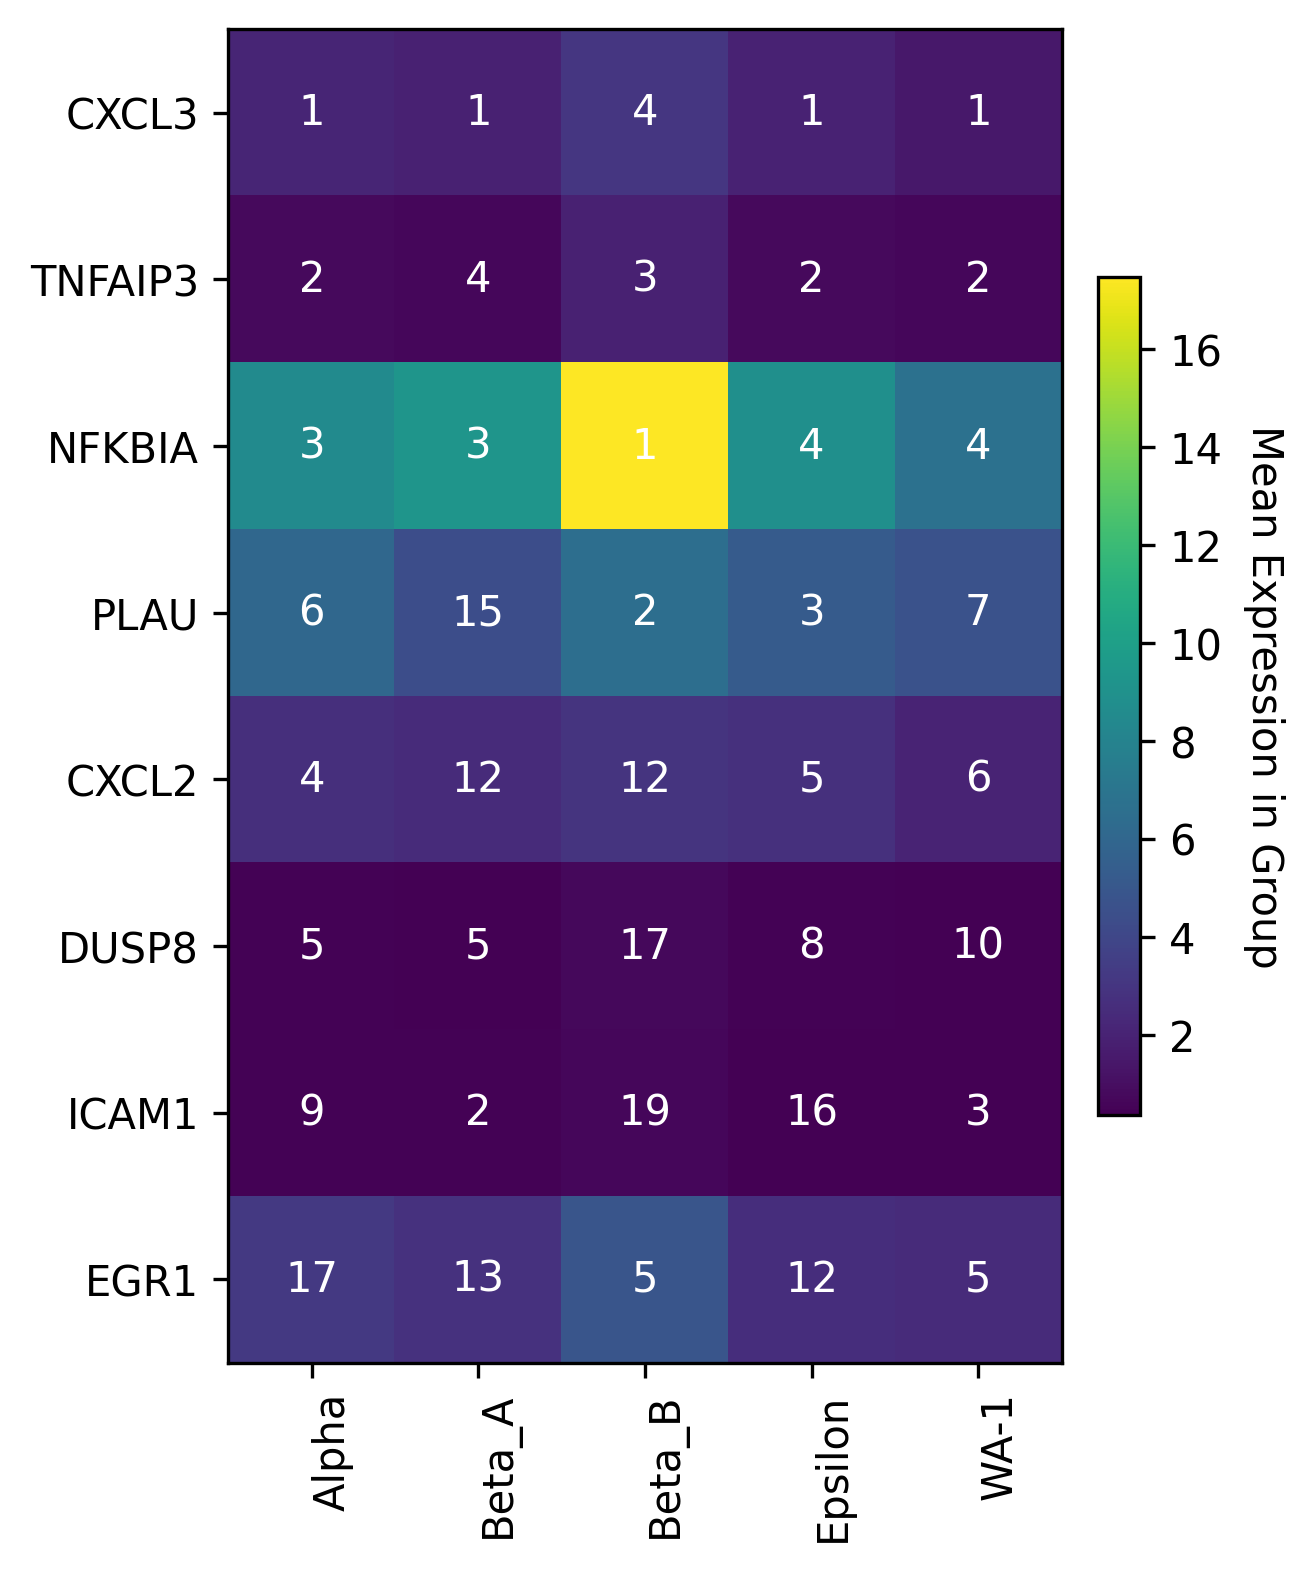

In [55]:
with plt.rc_context({"figure.dpi": (300)}):
    cmap = matplotlib.cm.get_cmap('viridis')

    fig, ax = plt.subplots(figsize=(4,8))
    im = ax.imshow(expression_df, cmap = cmap)

    ax.set_xticks(np.arange(ranking_df.shape[1]))
    ax.set_yticks(np.arange(ranking_df.shape[0]))

    ax.set_xticklabels(ranking_df.columns)
    ax.set_yticklabels(ranking_df.index)

    # Loop over data dimensions and create text annotations.
    for i, variant in enumerate(ranking_df):
        for j, gene in enumerate(ranking_df[variant]):
            text = ax.text(i, j, gene,
                           ha="center", va="center", color="w")

    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
             rotation_mode="anchor")
    fig.tight_layout()

    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
#     cbar.ax.set_title('# of contacts')
    cbar.set_label('Mean Expression in Group', rotation = 270, labelpad = 15)


    plt.show()
    ax.get_figure().savefig('round2_figs/round2_correlation_matrix.pdf', bbox_inches='tight')    